In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import RegexpTokenizer
import collections
import seaborn as sns

In [2]:
data = pd.read_csv('data/results.csv')

In [3]:
# contagem de documentos
total_documents = data.text.count()

In [4]:
# pre processamento e tokenizacao de todas as palavras dos textos
texts = ''.join(data.text).lower()
regex = RegexpTokenizer(r'[A-zÀ-ú\d]+')
tokens = regex.tokenize(texts)

# tokens

In [5]:
# frequencia das palavras
word_counter = collections.Counter(tokens)

In [6]:
# produz estatisticas necessarias
total_word_occurrences = sum(word_counter.values())
vocabulary_size = len(word_counter.keys())
most_frequent_words = len({x: word_counter[x] for x in word_counter if word_counter[x] > 1000})
less_frequent_words = len({x: word_counter[x] for x in word_counter if word_counter[x] == 1})

In [7]:
# construcao da tabela da primeira pergunta
table1 = pd.DataFrame(data={'names':[
                            'Total Documents', 
                            'Total word ocurrences', 
                            'Vocabulary size', 
                            'Words occurring > 1000 times', 
                            'Words occurring once'
                            ], 
                   'values':[
                           total_documents, 
                           total_word_occurrences, 
                           vocabulary_size, 
                           most_frequent_words, 
                           less_frequent_words
                           ]
                  })

In [8]:
table1

,names,values
0,Total Documents,249
1,Total word ocurrences,216727
2,Vocabulary size,23114
3,Words occurring > 1000 times,23
4,Words occurring once,11329


In [9]:
#QUESTAO 2

# construcao da tabela da segunda pergunta
ranking = 1
words, frequencies, rankings, probs, rprobs = [], [], [], [], []
for k,v in word_counter.most_common():
    prob = (v/total_word_occurrences) * 100
    words.append(k)
    frequencies.append(v)
    rankings.append(ranking)
    probs.append(prob)
    rprobs.append(ranking * prob / 100)
    ranking += 1

words_statistics = pd.DataFrame()
words_statistics['Word'] = words
words_statistics['Freq'] = frequencies
words_statistics['r'] = rankings
words_statistics['Pr(%)'] = probs
words_statistics['r.Pr'] = rprobs

In [10]:
words_statistics.head(50)

,Word,Freq,r,Pr(%),r.Pr
0,de,10207,1,4.709612,0.047096
1,a,7491,2,3.456422,0.069128
2,o,6602,3,3.046229,0.091387
3,que,6551,4,3.022697,0.120908
4,e,5734,5,2.645725,0.132286
5,do,3464,6,1.598324,0.095899
6,em,3380,7,1.559566,0.109170
7,da,3009,8,1.388383,0.111071
8,um,2696,9,1.243961,0.111957
9,para,2322,10,1.071394,0.107139


In [11]:
# encontra o melhor parametro c para as palavras
probs = words_statistics['Pr(%)'] / 100
best_c = np.mean(words_statistics['r.Pr'])
words_statistics['bestc'] = best_c / probs
best_c

0.09090404914299476

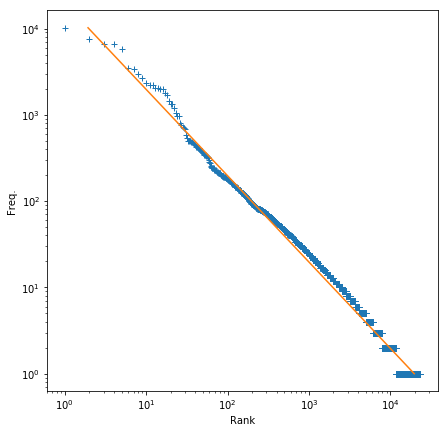

In [12]:
#QUESTAO 3

# plota a curva de rank-frequência para as palavras
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")

plt.plot(words_statistics['r'], words_statistics['Freq'], linestyle='None', marker='+')
plt.plot(words_statistics['bestc'], words_statistics['Freq'], linestyle='-', marker='None')
plt.xlabel('Rank')
plt.ylabel('Freq.')
plt.show()

In [13]:
# produz bigramas e suas estatisticas
bigrams = nltk.bigrams(tokens)
f_bigrams = nltk.FreqDist(bigrams)
total_bigrams_occurrences = sum(f_bigrams.values())

In [18]:
# construcao da tabela com as estastisticas dos bigramas
bigrams_statistics = pd.DataFrame()
bigrams_statistics['Bigram'] = list(f_bigrams.keys())
bigrams_statistics['Freq'] = list(f_bigrams.values())
bigrams_statistics['r'] = bigrams_statistics.Freq.rank(ascending=False, method='first')
bigrams_statistics['Pr(%)'] = (bigrams_statistics['Freq']/total_bigrams_occurrences) * 100
bigrams_statistics['r.Pr'] = bigrams_statistics['r'] * (bigrams_statistics['Pr(%)'] / 100)

bigrams_statistics.r = bigrams_statistics.r.astype(int)
bigrams_statistics.sort_values(by=['Freq'], ascending=False)

# bigrams_statistics

,Bigram,Freq,r,Pr(%),r.Pr
242,"(que, o)",500,1,0.230706,0.002307
258,"(o, que)",395,2,0.182258,0.003645
210,"(que, a)",376,3,0.173491,0.005205
1973,"(de, um)",361,4,0.166570,0.006663
100,"(com, o)",326,5,0.150420,0.007521
1067,"(com, a)",320,6,0.147652,0.008859
1900,"(e, a)",318,7,0.146729,0.010271
957,"(e, o)",283,8,0.130580,0.010446
418,"(que, não)",276,9,0.127350,0.011461
180,"(para, a)",259,10,0.119506,0.011951


In [15]:
# encontra o melhor parametro c para os bigramas
probs = bigrams_statistics['Pr(%)'] / 100
best_c = np.mean(bigrams_statistics['r.Pr'])
bigrams_statistics['bestc'] = best_c / probs
best_c

0.30613298225959196

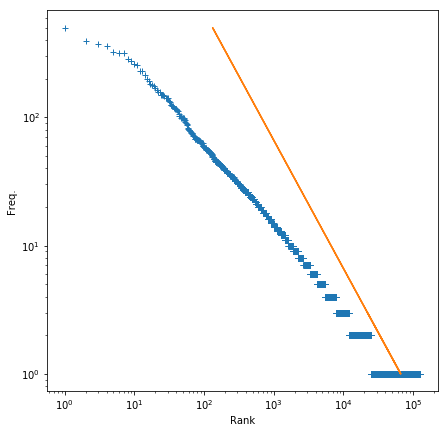

In [16]:
# plota a curva de rank-frequência para os bigramas
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")

plt.plot(bigrams_statistics['r'], bigrams_statistics['Freq'], linestyle='None', marker='+')
plt.plot(bigrams_statistics['bestc'], bigrams_statistics['Freq'], linestyle='-', marker='None')
plt.xlabel('Rank')
plt.ylabel('Freq.')
plt.show()

In [17]:
# Reproduza a tabela 4.5 do livro texto considerando a sua coleção (5 pts)
def occurrences_counter(n=0):
    return len(words_statistics[words_statistics.Freq == n])

n_occurrences = list(range(1,11))
predicted_proportion = [round(1/(n*(n+1)), 3) for n in n_occurrences]
actual_proportion = [round(occurrences_counter(n)/vocabulary_size, 3) for n in n_occurrences]
actual_number_words = [occurrences_counter(n) for n in n_occurrences]

proportions = pd.DataFrame()
proportions['Number of Occurrences'] = n_occurrences
proportions['Predicted proportion'] = predicted_proportion
proportions['Actual Proportion'] = actual_proportion
proportions['Actual Number of Words'] = actual_number_words
proportions

,Number of Occurrences,Predicted proportion,Actual Proportion,Actual Number of Words
0,1,0.500,0.490,11329
1,2,0.167,0.164,3784
2,3,0.083,0.080,1856
3,4,0.050,0.050,1155
4,5,0.033,0.035,816
5,6,0.024,0.023,536
6,7,0.018,0.018,427
7,8,0.014,0.015,346
8,9,0.011,0.012,288
9,10,0.009,0.011,254
